## Predicting from pretrained network

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.conv_learner import *
PATH = "data/random_pics/"

In [18]:
!ls {PATH} 

In [26]:
!wget https://devblogs.nvidia.com/parallelforall/wp-content/uploads/2016/07/cute.jpg

--2017-11-17 14:36:36--  https://devblogs.nvidia.com/parallelforall/wp-content/uploads/2016/07/cute.jpg
Resolving devblogs.nvidia.com (devblogs.nvidia.com)... 161.47.17.210
Connecting to devblogs.nvidia.com (devblogs.nvidia.com)|161.47.17.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 140391 (137K) [image/jpeg]
Saving to: ‘cute.jpg’

cute.jpg            100%[===================>] 137.10K   464KB/s    in 0.3s    

2017-11-17 14:36:37 (464 KB/s) - ‘cute.jpg’ saved [140391/140391]



In [3]:
!wget https://upload.wikimedia.org/wikipedia/commons/a/a3/June_odd-eyed-cat.jpg

--2017-11-17 14:20:57--  https://upload.wikimedia.org/wikipedia/commons/a/a3/June_odd-eyed-cat.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 992514 (969K) [image/jpeg]
Saving to: ‘June_odd-eyed-cat.jpg’

June_odd-eyed-cat.j 100%[===================>] 969.25K  --.-KB/s    in 0.04s   

2017-11-17 14:20:57 (21.8 MB/s) - ‘June_odd-eyed-cat.jpg’ saved [992514/992514]



In [21]:
!mkdir {PATH}/train

In [27]:
!cp June_odd-eyed-cat.jpg {PATH}/train
!cp cute.jpg {PATH}/train
!ls {PATH}/train

cute.jpg  June_odd-eyed-cat.jpg


In [ ]:
ImageClassifierData.from_csv

In [41]:
f_model = resnet34
tfms = tfms = tfms_from_model(f_model, 299)
data = ImageClassifierData.from_csv(PATH, 'train', f'{PATH}/train.csv', 1, tfms, val_idxs=[1], skip_header=False)

### Look at data

In [42]:
x,y=next(iter(data.trn_dl))

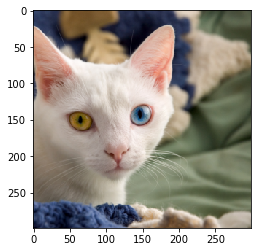

In [43]:
plt.imshow(data.trn_ds.denorm(x)[0]);

In [44]:
x,y=next(iter(data.val_dl))

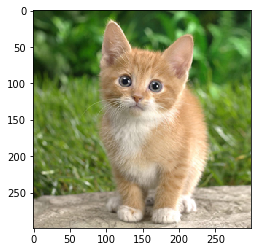

In [45]:
plt.imshow(data.val_ds.denorm(x)[0]);

## Predicting from imagenet models

In [46]:
m = resnet34(True)
bm = BasicModel(m.cuda(), name='resnet34')

In [47]:
learn = ConvLearner(data, bm)

In [48]:
 learn.TTA()

ValueError: y_true contains only one label (0). Please provide the true labels explicitly through the labels argument.